In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import os

In [45]:
#radiation is good from Ceres
#temperature is sus from Merra-2 (Val doesn't like)

#NASA/POWER CERES/MERRA2 Native Resolution Daily Data
#Dates (month/day/year): 09/07/2023 through 11/02/2023
#Location: Latitude  38.0   Longitude -119.0
#Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 2246.85 meters
#The value for missing source data that cannot be computed or is outside of the sources availability range: -999
#Parameter(s):
#LLSKY_SFC_SW_DWN      CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (MJ/m^2/day)
#CLRSKY_SFC_SW_DWN      CERES SYN1deg Clear Sky Surface Shortwave Downward Irradiance (MJ/m^2/day)
#TOA_SW_DWN             CERES SYN1deg Top-Of-Atmosphere Shortwave Downward Irradiance (MJ/m^2/day)
#ALLSKY_SFC_PAR_TOT     CERES SYN1deg All Sky Surface PAR Total (W/m^2)
#CLRSKY_SFC_PAR_TOT     CERES SYN1deg Clear Sky Surface PAR Total (W/m^2)
#ALLSKY_SFC_UVA         CERES SYN1deg All Sky Surface UVA Irradiance (W/m^2)
#ALLSKY_SFC_UVB         CERES SYN1deg All Sky Surface UVB Irradiance (W/m^2)
#T2M                    MERRA-2 Temperature at 2 Meters (C)
#T2MDEW                 MERRA-2 Dew/Frost Point at 2 Meters (C)
#T2MWET                 MERRA-2 Wet Bulb Temperature at 2 Meters (C)
#TS                     MERRA-2 Earth Skin Temperature (C)
#RH2M                   MERRA-2 Relative Humidity at 2 Meters (%)
#QV2M                   MERRA-2 Specific Humidity at 2 Meters (g/kg)
#PRECTOTCORR            MERRA-2 Precipitation Corrected (mm/day)
#PS                     MERRA-2 Surface Pressure (kPa)
#WS2M                   MERRA-2 Wind Speed at 2 Meters (m/s)

nasa_dfi = pd.read_csv("/content/drive/MyDrive/520 Mono Lake/data/POWER_Point_Daily_20230907_20231102_038d00N_0119d00W_LST.csv", header=24);
year = nasa_dfi['YEAR'].values
doy = nasa_dfi['DOY'].values
Date = pd.to_datetime((year * 1000 + doy), format='%Y%j')
nasa_df = nasa_dfi.drop(['YEAR','DOY'],axis=1);
nasa_df['Date'] = Date
nasa_df.head()

,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,T2M,T2MDEW,T2MWET,TS,RH2M,QV2M,PRECTOTCORR,PS,WS2M,Date
0,25.44,25.44,32.52,127.75,127.47,16.80,0.46,15.65,-1.96,6.84,16.91,36.06,4.33,0.00,77.98,2.24,2023-09-07
1,25.26,25.35,32.31,127.20,127.41,16.77,0.46,15.46,-2.02,6.72,16.18,35.38,4.27,0.00,78.23,2.99,2023-09-08
2,15.49,23.45,32.10,83.01,122.96,11.39,0.31,17.19,7.70,12.44,18.24,56.00,8.54,2.28,78.36,1.88,2023-09-09
3,18.77,23.83,31.88,99.19,124.78,13.50,0.38,17.53,8.53,13.03,18.72,58.31,8.91,2.33,78.23,1.20,2023-09-10
4,20.22,23.41,31.66,104.84,120.81,14.03,0.39,17.56,6.98,12.27,19.05,52.44,8.06,0.86,78.06,0.89,2023-09-11


In [46]:
#Precipitation Data from Caleb's source

precip_dfi = pd.read_csv('/content/drive/MyDrive/520 Mono Lake/data/precip/mono_lake_precip_new.csv');
time_precip = pd.to_datetime(precip_dfi['DateTime'].values)
precip_vals = precip_dfi['044881_precip'].values*25.4
precip_df = precip_dfi.drop(['040943_precip','042756_precip','047606_precip','043369_precip','USS0019L42S_precip','USS0019L38S_precip',
                             'USS0019L17S_precip','USS0019L13S_precip','USS0019L08S_precip','USS0019L07S_precip','041072_precip',
                             '040684_precip','045779_precip','US1CAMN0001_precip','US1CAMN0004_precip','DateTime'],axis=1);
precip_df['Date'] = time_precip;
precip_df['044881_precip_mm'] = precip_vals
precip_df.head()

,044881_precip,Date,044881_precip_mm
0,0.00,2023-09-07,0.000
1,0.00,2023-09-08,0.000
2,0.00,2023-09-09,0.000
3,0.07,2023-09-10,1.778
4,0.00,2023-09-11,0.000


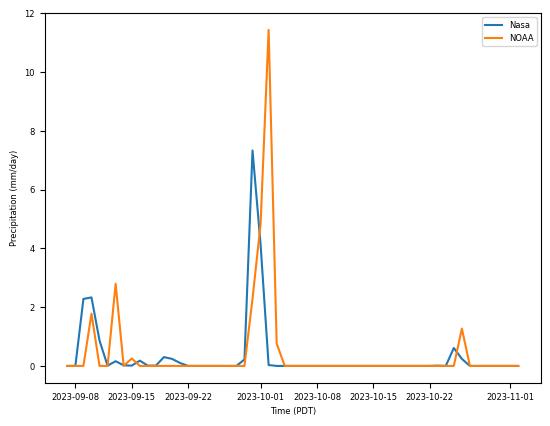

In [47]:
precip = nasa_df['PRECTOTCORR'].values
precip_2 = precip_df['044881_precip_mm'].values
time = nasa_df['Date'].values
plt.rcParams.update({'font.size':6});
plt.plot(time,precip);
plt.plot(time,precip_2);
plt.xlabel('Time (PDT)');
plt.ylabel('Precipitation (mm/day)');
plt.legend(['Nasa','NOAA']);

In [48]:
#Evaporation Pan data from station CQ251

evap_pan_data_dfi = pd.read_excel("/content/drive/MyDrive/520 Mono Lake/data/exap_pan_data.xlsx", header=1);
datetime = evap_pan_data_dfi['Date Time, GMT-07:00'].values
datetime_PDT = datetime + np.timedelta64(-7,'h')
level = evap_pan_data_dfi['EV pan Level   mm, Millimeter (LGR S/N: 21620751)'];
datetime_PDT_pd = []
for i in range(len(datetime_PDT)):
  datetime_PDT_pd.append(pd.Timestamp(datetime_PDT[i]))
evap_pan_data_df = evap_pan_data_dfi.drop(['Date Time, GMT-07:00','#','Host Connected (LGR S/N: 21620751)','Stopped (LGR S/N: 21620751)','End Of File (LGR S/N: 21620751)'],axis=1);
evap_pan_data_df['Date'] = datetime_PDT_pd
evap_pan_data_df['Evap_Diff'] = evap_pan_data_df['EV pan Level   mm, Millimeter (LGR S/N: 21620751)'].diff()
evap_pan_data_df = evap_pan_data_df[evap_pan_data_df['Evap_Diff'] <= 0]
cut_time = pd.to_datetime('2023-10-25T23:00:00')
cut_time_2 = pd.to_datetime('2023-09-14T23:00:00')
evap_pan_data_df = evap_pan_data_df[evap_pan_data_df['Date'] <= cut_time];
evap_pan_data_df = evap_pan_data_df[evap_pan_data_df['Date'] >= cut_time_2];
evap_pan_data_df['Evap_Diff_Abs'] = evap_pan_data_df['Evap_Diff'].abs()
evap_pan_data_df.tail()

,"EV pan Level mm, Millimeter (LGR S/N: 21620751)",Date,Evap_Diff,Evap_Diff_Abs
581,203.534,2023-10-25 13:37:34,-0.312,0.312
582,203.461,2023-10-25 15:37:34,-0.073,0.073
583,203.191,2023-10-25 17:37:34,-0.270,0.270
584,202.986,2023-10-25 19:37:34,-0.205,0.205
585,202.891,2023-10-25 21:37:34,-0.095,0.095


In [49]:
daily_evap_sum_abs = evap_pan_data_df.groupby(evap_pan_data_df['Date'].dt.date)['Evap_Diff_Abs'].sum()
daily_evap_sum_abs_df = daily_evap_sum_abs.reset_index()
daily_evap_sum_abs_df.columns = ['Date', 'Evap_Sum_Abs']
daily_evap_sum_abs_df['Date'] = pd.to_datetime(daily_evap_sum_abs_df['Date'])
daily_evap_sum_abs_array = daily_evap_sum_abs_df.values
daily_evap_sum_abs_df.head()

,Date,Evap_Sum_Abs
0,2023-09-14,0.186
1,2023-09-15,2.264
2,2023-09-16,2.947
3,2023-09-17,1.489
4,2023-09-18,1.854


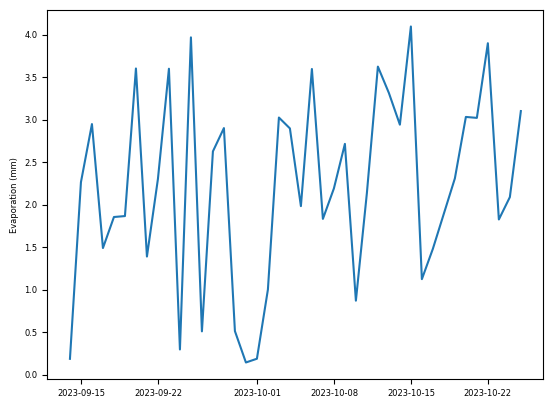

In [50]:
#pan = evap_pan_data_df['EV pan Level   mm, Millimeter (LGR S/N: 21620751)'].values
#time = evap_pan_data_df['Date'].values
dates = daily_evap_sum_abs_array[:, 0]
evap_sum_abs = daily_evap_sum_abs_array[:, 1]
plt.plot(dates,evap_sum_abs);
plt.ylabel('Evaporation (mm)');

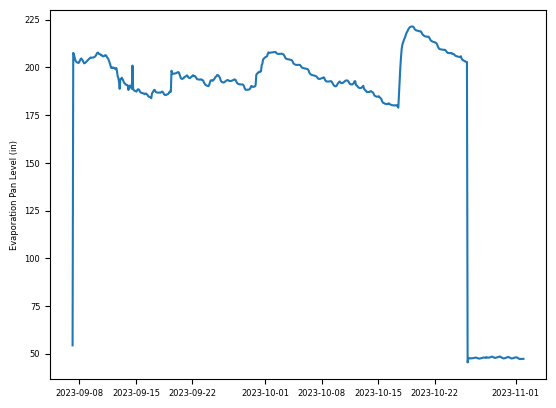

In [51]:
plt.plot(datetime_PDT, level);
plt.ylabel('Evaporation Pan Level (in)');

In [52]:

# STATION: CQ251
# STATION NAME: Mono Lake North Shore
# LATITUDE: 38.06972
# LONGITUDE: -118.94806
# ELEVATION [ft]: 6421.0
# STATE: CA

#Fahrenheit	%	Miles/hour	Degrees	code	Fahrenheit

CQ251_dfi = pd.read_csv('/content/drive/MyDrive/520 Mono Lake/data/CQ251_Sep_Nov_23_Meso.csv',header=[6]);
CQ251_dfi2 = CQ251_dfi.drop([0]);
date_txt = CQ251_dfi2['Date_Time'].values
date_pd = []
for d in date_txt:
  t = d.removesuffix(' UTC')
  month = t[0:2]
  day = t[3:5]
  year = t[6:10]
  ti = t[11:16]
  dt = year + '-' + month + '-' + day + 'T' + ti
  dt_np = np.datetime64(dt)
  dt_np_GMT = dt_np + np.timedelta64(-7,'h')
  dt_pd = pd.Timestamp(dt_np_GMT)
  date_pd.append(dt_pd)
CQ251_dfi2['Date'] = date_pd
CQ251_df = CQ251_dfi2.drop(['Date_Time','Station_ID','wind_chill_set_1d','heat_index_set_1d','wind_cardinal_direction_set_1d'],axis=1);
CQ251_df['Ta'] = pd.to_numeric(CQ251_df['air_temp_set_1'])
CQ251_df['r'] = pd.to_numeric(CQ251_df['relative_humidity_set_1'])
CQ251_df['wind speed'] = pd.to_numeric(CQ251_df['wind_speed_set_1'])
CQ251_df['wind dir'] = pd.to_numeric(CQ251_df['wind_direction_set_1'])
CQ251_df['Tdew'] = pd.to_numeric(CQ251_df['dew_point_temperature_set_1d'])
CQ251_daily_dfi = CQ251_df.groupby(pd.Grouper(key='Date',axis=0,freq='D')).mean(numeric_only=True)
CQ251_daily_dfi = CQ251_daily_dfi.reset_index()
date_c = CQ251_daily_dfi['Date'].values
date_c_pd = []
for d in date_c:
  date_c_pd.append(pd.Timestamp(d))
CQ251_daily_df = CQ251_daily_dfi.drop(['Date'],axis=1)
CQ251_daily_df['Date'] = date_c_pd
CQ251_daily_df.head()

,Ta,r,wind speed,wind dir,Tdew,Date
0,70.997143,20.822857,24.687143,192.785714,28.005714,2023-08-31
1,65.274583,23.666250,25.575833,174.879167,26.977500,2023-09-01
2,60.888750,39.247500,23.586250,175.925000,34.647500,2023-09-02
3,NaN,NaN,NaN,NaN,NaN,2023-09-03
4,52.157727,24.050000,5.851364,122.854545,-5.809545,2023-09-04


In [53]:
EV_nasa_df = pd.merge_asof(daily_evap_sum_abs_df,nasa_df,on='Date',tolerance=pd.Timedelta(1,"d"))
EV_nasa_precip_df = pd.merge_asof(EV_nasa_df,precip_df,on='Date',tolerance=pd.Timedelta(1,"d"))
Full_df = pd.merge_asof(EV_nasa_precip_df,CQ251_daily_df,on='Date',tolerance=pd.Timedelta(1,"d"))
Full_df.head()

,Date,Evap_Sum_Abs,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,T2M,...,PRECTOTCORR,PS,WS2M,044881_precip,044881_precip_mm,Ta,r,wind speed,wind dir,Tdew
0,2023-09-14,0.186,23.52,23.73,31.01,120.05,121.13,15.75,0.42,16.16,...,0.02,78.06,1.81,0.00,0.000,58.605833,32.460417,5.594583,94.662500,14.872083
1,2023-09-15,2.264,23.54,23.74,30.79,120.89,121.96,15.96,0.43,17.67,...,0.01,78.11,1.38,0.01,0.254,58.210833,35.240000,5.413750,108.545833,28.136250
2,2023-09-16,2.947,23.09,23.36,30.57,117.39,118.79,15.41,0.41,17.05,...,0.18,78.09,2.07,0.00,0.000,59.120417,37.479583,5.474167,125.325000,30.990000
3,2023-09-17,1.489,21.43,22.69,30.34,110.36,116.66,14.59,0.39,16.68,...,0.01,78.02,1.73,0.00,0.000,58.631250,38.479583,5.810000,111.083333,30.856250
4,2023-09-18,1.854,22.02,22.72,30.11,112.02,115.41,14.76,0.38,16.65,...,0.01,77.84,1.19,0.00,0.000,58.460833,37.335417,6.420000,146.150000,29.892083


In [54]:
hg_dfi = pd.read_csv('/content/drive/MyDrive/520 Mono Lake/data/t-based_evap/hargreaves_samani_pet_estimate.csv');
pet = hg_dfi['PET'].values
pet_mm = pet*25.4
date = hg_dfi['date'].values
date_t = []
for d in date:
  date_t.append(pd.Timestamp(d))
hg_dfi['PET_hg'] = pet_mm
hg_dfi['Date'] = date_t
hg_df = hg_dfi.drop(['PET','date'],axis=1)
hg_df.head()

,PET_hg,Date
0,3.467865,2023-09-01
1,2.496642,2023-09-02
2,3.478810,2023-09-04
3,4.352796,2023-09-05
4,4.426011,2023-09-06


In [55]:
harm_dfi = pd.read_csv('/content/drive/MyDrive/520 Mono Lake/data/t-based_evap/hamon_pet_estimate.csv');
pet = harm_dfi['PET'].values
pet_mm = pet*25.4
date = harm_dfi['date'].values
date_t = []
for d in date:
  date_t.append(pd.Timestamp(d))
harm_dfi['PET_harm']= pet_mm
harm_dfi['Date'] = date_t
harm_df = harm_dfi.drop(['PET','date'],axis=1)
harm_df.head()

,PET_harm,Date
0,3.030304,2023-09-01
1,2.573153,2023-09-02
2,1.533276,2023-09-04
3,2.054799,2023-09-05
4,2.361442,2023-09-06


In [56]:
Full_df = pd.merge_asof(Full_df,hg_df,on='Date',tolerance=pd.Timedelta(1,"d"))
Full_df = pd.merge_asof(Full_df,harm_df,on='Date',tolerance=pd.Timedelta(1,"d"))
Full_df.head()

,Date,Evap_Sum_Abs,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,T2M,...,WS2M,044881_precip,044881_precip_mm,Ta,r,wind speed,wind dir,Tdew,PET_hg,PET_harm
0,2023-09-14,0.186,23.52,23.73,31.01,120.05,121.13,15.75,0.42,16.16,...,1.81,0.00,0.000,58.605833,32.460417,5.594583,94.662500,14.872083,4.049806,2.210600
1,2023-09-15,2.264,23.54,23.74,30.79,120.89,121.96,15.96,0.43,17.67,...,1.38,0.01,0.254,58.210833,35.240000,5.413750,108.545833,28.136250,4.001516,2.076510
2,2023-09-16,2.947,23.09,23.36,30.57,117.39,118.79,15.41,0.41,17.05,...,2.07,0.00,0.000,59.120417,37.479583,5.474167,125.325000,30.990000,4.046110,2.227103
3,2023-09-17,1.489,21.43,22.69,30.34,110.36,116.66,14.59,0.39,16.68,...,1.73,0.00,0.000,58.631250,38.479583,5.810000,111.083333,30.856250,4.086270,2.153615
4,2023-09-18,1.854,22.02,22.72,30.11,112.02,115.41,14.76,0.38,16.65,...,1.19,0.00,0.000,58.460833,37.335417,6.420000,146.150000,29.892083,4.146278,2.176967


In [57]:
wind = Full_df['wind dir'].values
wind_fl = []
for w in wind:
  wind_fl.append(float(w))
Full_df['Wind Direction'] = wind_fl
#Valid_wind_all_dfi = Full_df.loc[Full_df['Wind Direction'] <= 130.0]
#Valid_wind_all_df = Valid_wind_all_dfi.loc[Valid_wind_all_dfi['Wind Direction'] >= 0.0]
Valid_wind_all_df.head()

,Date,Evap_Sum_Abs,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,T2M,...,044881_precip,044881_precip_mm,Ta,r,wind speed,wind dir,Tdew,PET_hg,PET_harm,Wind Direction
0,2023-09-14,0.186,23.52,23.73,31.01,120.05,121.13,15.75,0.42,16.16,...,0.00,0.000,58.605833,32.460417,5.594583,94.662500,14.872083,4.049806,2.210600,94.662500
1,2023-09-15,2.264,23.54,23.74,30.79,120.89,121.96,15.96,0.43,17.67,...,0.01,0.254,58.210833,35.240000,5.413750,108.545833,28.136250,4.001516,2.076510,108.545833
2,2023-09-16,2.947,23.09,23.36,30.57,117.39,118.79,15.41,0.41,17.05,...,0.00,0.000,59.120417,37.479583,5.474167,125.325000,30.990000,4.046110,2.227103,125.325000
3,2023-09-17,1.489,21.43,22.69,30.34,110.36,116.66,14.59,0.39,16.68,...,0.00,0.000,58.631250,38.479583,5.810000,111.083333,30.856250,4.086270,2.153615,111.083333
8,2023-09-22,2.302,23.11,23.05,29.19,115.52,115.21,15.11,0.38,10.76,...,0.00,0.000,46.827083,43.530417,6.831250,94.462500,23.700417,3.353931,1.362070,94.462500


In [58]:
Valid_wind_all_df.to_csv('/content/drive/MyDrive/520 Mono Lake/data/Dataframe.csv');

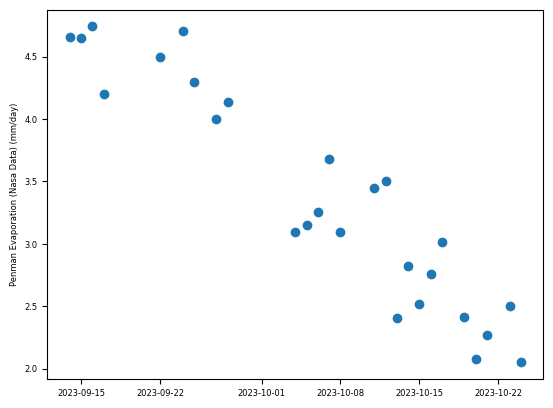

In [59]:
#Penman Formulation

S_down = Valid_wind_all_df['ALLSKY_SFC_SW_DWN'] *11.56407 #W/m2
temp = (Valid_wind_all_df['Ta'] - 32) * 5/9 + 273.15 #K
surface_temp = Valid_wind_all_df['TS'] + 273.15 #K
relative_humidity = Valid_wind_all_df['r'] / 100
u2m = Valid_wind_all_df['wind speed'] * 0.44704 #m/s
pressure = Valid_wind_all_df['PS'] / 10 #hPa

albedo = 0.05
emissivity = 0.97
sigma = 5.67004e-8 #W/m2/K4
R_v = 461.5 #J/kg/K
C_p = 1005 #J/kg/K
lmbda = 4186.8*(597 - 0.57*(temp-273.15)) #J/kg
gamma = C_p*pressure/(0.622*lmbda) #hPa/K
e_sat = (2.53e9) * np.exp(-(5.42e3) / temp) #hPa
e_atm = relative_humidity*e_sat #hPa
delta = lmbda*e_sat/(R_v*temp**2) #hPa/K
fe_u2m = 0.26*(1 + 0.54*u2m) #mm/day/hPa
E_a = fe_u2m*(e_sat - e_atm) #mm/day
L_up = emissivity*sigma*surface_temp**4 #W/m2
epsilon_a = 1.24*(e_atm/temp)**(1/7)
L_down = epsilon_a*emissivity*sigma*temp**4 #W/m2
Q_n = S_down*(1-albedo) + L_down - L_up #W/m2
Efull = (delta*Q_n/lmbda*86400 + gamma*E_a)/(delta+gamma)
time = Valid_wind_all_df['Date'].values
E = Efull[Efull>=1.5]
time = time[Efull>=1.5]
plt.scatter(time,E)
plt.ylabel('Penman Evaporation (Nasa Data) (mm/day)');

3.554957658468374


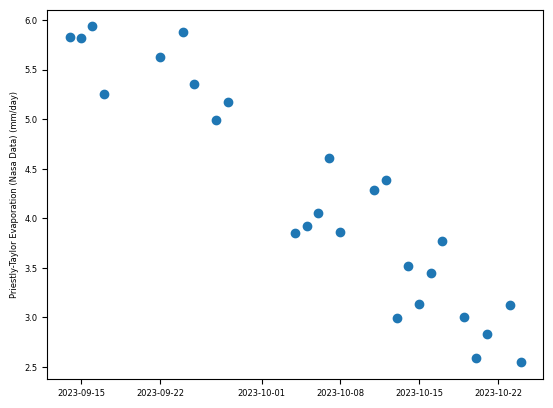

In [60]:
# Priestly-Taylor Formulation

# Use same formulation for Qn, delta, gamma as in Penman-Montieth
ptEfull = 1.26*delta*Q_n*86400/((delta+gamma)*lmbda) #[W/m2]
print(np.mean(ptEfull))
time = Valid_wind_all_df['Date'].values
ptE = ptEfull[ptEfull>=1.5]
time = time[ptEfull>=1.5]
plt.scatter(time,ptE)
plt.ylabel('Priestly-Taylor Evaporation (Nasa Data) (mm/day)');

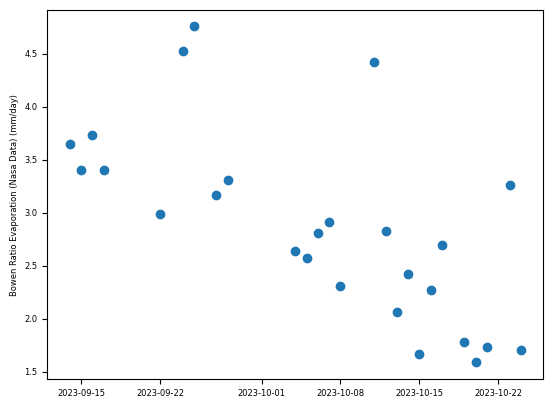

In [61]:
# Bowen Ratio Formulation
temp_s = Valid_wind_all_df['TS'] + 273.15 #K
e_sat_s = (2.53e9) * np.exp(-(5.42e3) / temp_s) #hPa
num = 86400*Q_n*(e_sat - e_atm)
denom = gamma*(temp_s-temp) + (e_sat_s - e_atm)
BREfull = num/(denom*lmbda);
time = Valid_wind_all_df['Date'].values
BRE = BREfull[BREfull>=1.5]
time = time[BREfull>=1.5]
plt.scatter(time,BRE);
plt.ylabel('Bowen Ratio Evaporation (Nasa Data) (mm/day)');


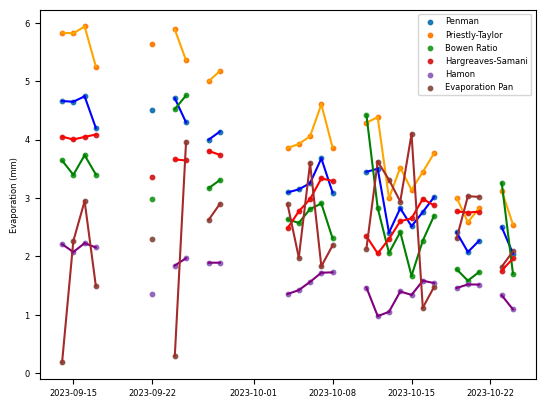

2.402076923076922


In [62]:
hg = Valid_wind_all_df['PET_hg'].values;
hg = hg[Efull>=1.5]
harm = Valid_wind_all_df['PET_harm'].values;
harm = harm[Efull>=1.5]
evap_panfull = Valid_wind_all_df['Evap_Sum_Abs'].values
evap_pan = evap_panfull[Efull>=1.5]

# Plotting consecutive points with lines
E_n = E.reset_index(drop=True)
ptE_n = ptE.reset_index(drop=True)
BRE_n = BRE.reset_index(drop=True)

for i in range(len(time) - 1):
    # Check if the current and next dates are consecutive
    if (time[i + 1] - time[i]) == np.timedelta64(1, 'D'):
        plt.plot([time[i], time[i + 1]], [E_n[i], E_n[i + 1]], color="blue")
        plt.plot([time[i], time[i + 1]], [ptE_n[i], ptE_n[i + 1]], color="Orange")
        plt.plot([time[i], time[i + 1]], [BRE_n[i], BRE_n[i + 1]], color ="Green")
        plt.plot([time[i], time[i + 1]], [hg[i], hg[i + 1]],color="red")
        plt.plot([time[i], time[i + 1]], [harm[i], harm[i + 1]], color="purple")
        plt.plot([time[i], time[i + 1]], [evap_pan[i], evap_pan[i + 1]], color="brown")

# Set y-axis label and legend
plt.ylabel('Evaporation (mm)')
plt.scatter(time,E, s=10, label="Penman");
plt.scatter(time,ptE, s=10, label="Priestly-Taylor");
plt.scatter(time,BRE, s=10, label="Bowen Ratio");
plt.scatter(time,hg, s=10, label="Hargreaves-Samani");
plt.scatter(time,harm, s=10, label="Hamon");
plt.scatter(time,evap_pan, s=10, label="Evaporation Pan");
plt.legend()

# Show the plot
plt.show()

print(np.mean(evap_pan))

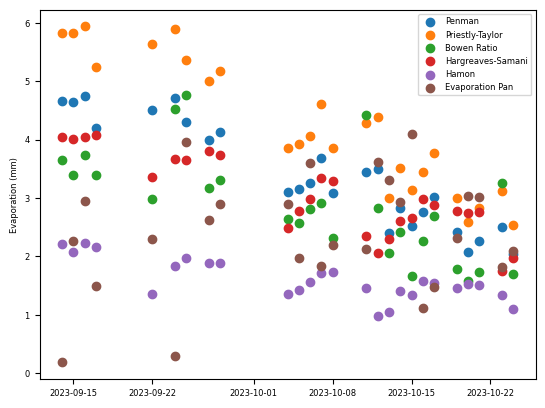

In [63]:
hg = Valid_wind_all_df['PET_hg'].values;
hg = hg[Efull>=1.5]
harm = Valid_wind_all_df['PET_harm'].values;
harm = harm[Efull>=1.5]
plt.scatter(time,E, label = 'Penman');
plt.scatter(time,ptE, label = 'Priestly-Taylor');
plt.scatter(time,BRE, label = 'Bowen Ratio');
plt.scatter(time,hg,label = 'Hargreaves-Samani');
plt.scatter(time,harm,label='Hamon');
plt.ylabel('Evaporation (mm)');
evap_panfull = Valid_wind_all_df['Evap_Sum_Abs'].values
evap_pan = evap_panfull[Efull>=1.5]
plt.scatter(time,evap_pan, label = 'Evaporation Pan');
plt.legend();

Score:0.07739767345426396
Intercept: 3.45271114103639
Coefficient:[-0.3106458]
Average Evap per day (mm)3.3820969916339148


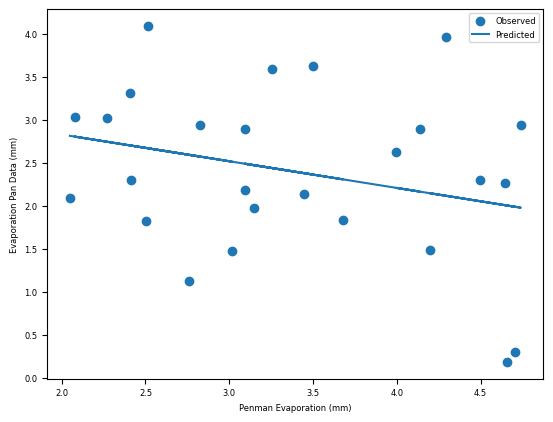

In [64]:
E_ = np.array(E).reshape(-1,1)
reg_pen = LinearRegression().fit(E_,evap_pan);
evap_pred_pen = reg_pen.predict(E_);
plt.scatter(E,evap_pan);
plt.plot(E,evap_pred_pen);
plt.xlabel('Penman Evaporation (mm)');
plt.ylabel('Evaporation Pan Data (mm)');
plt.legend(['Observed','Predicted']);
print(f"Score:{reg_pen.score(E_,evap_pan)}");
print(f"Intercept: {reg_pen.intercept_}");
print(f"Coefficient:{reg_pen.coef_}");
print(f"Average Evap per day (mm){sum(E)/len(E)}");

Score:0.07776277626064565
Intercept: 3.4485808262232944
Coefficient:[-0.247785]
Average Evap per day (mm)4.223435307420359


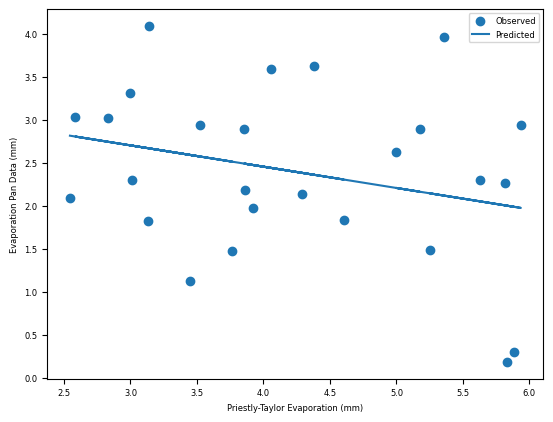

In [65]:
ptE_ = np.array(ptE).reshape(-1,1)
reg_pt = LinearRegression().fit(ptE_,evap_pan);
evap_pred_pt = reg_pt.predict(ptE_);
plt.scatter(ptE,evap_pan);
plt.plot(ptE,evap_pred_pt);
plt.xlabel('Priestly-Taylor Evaporation (mm)');
plt.ylabel('Evaporation Pan Data (mm)');
plt.legend(['Observed','Predicted']);
print(f"Score:{reg_pt.score(ptE_,evap_pan)}");
print(f"Intercept: {reg_pt.intercept_}");
print(f"Coefficient:{reg_pt.coef_}");
print(f"Average Evap per day (mm){sum(ptE)/len(ptE)}");

Score:0.07006805366414837
Intercept: 3.253493673173881
Coefficient:[-0.2968103]
Average Evap per day (mm)2.8685552629174564


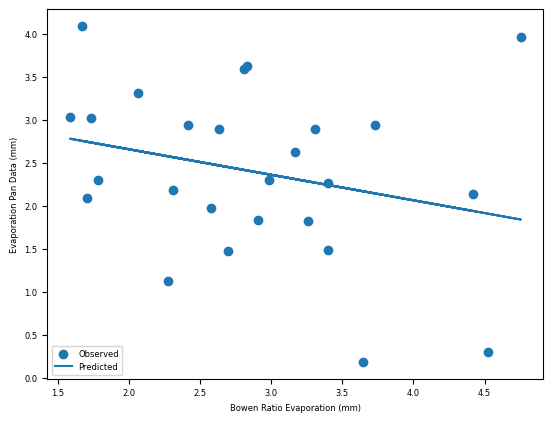

In [66]:
BRE_ = np.array(BRE).reshape(-1,1)
reg_bre = LinearRegression().fit(BRE_,evap_pan);
evap_pred_bre = reg_bre.predict(BRE_);
plt.scatter(BRE,evap_pan);
plt.plot(BRE,evap_pred_bre);
plt.xlabel('Bowen Ratio Evaporation (mm)');
plt.ylabel('Evaporation Pan Data (mm)');
plt.legend(['Observed','Predicted']);
print(f"Score:{reg_bre.score(BRE_,evap_pan)}");
print(f"Intercept: {reg_bre.intercept_}");
print(f"Coefficient:{reg_bre.coef_}");
print(f"Average Evap per day (mm){sum(BRE)/len(BRE)}");

Score:0.06816954629496741
Intercept: 3.6073085833247083
Coefficient:[-0.39627763]
Average Evap per day (mm)3.0413820436526553


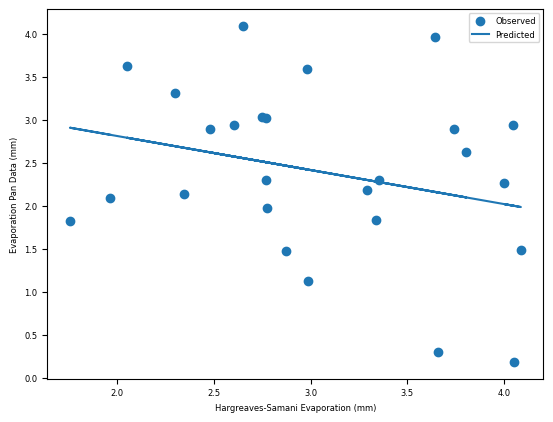

In [67]:
hg_ = np.array(hg).reshape(-1,1)
reg_hg = LinearRegression().fit(hg_,evap_pan);
evap_pred_hg = reg_hg.predict(hg_);
plt.scatter(hg,evap_pan);
plt.plot(hg,evap_pred_hg);
plt.xlabel('Hargreaves-Samani Evaporation (mm)');
plt.ylabel('Evaporation Pan Data (mm)');
plt.legend(['Observed','Predicted']);
print(f"Score:{reg_bre.score(hg_,evap_pan)}");
print(f"Intercept: {reg_hg.intercept_}");
print(f"Coefficient:{reg_hg.coef_}");
print(f"Average Evap per day (mm){sum(hg)/len(hg)}");

Score:0.11556949912191627
Intercept: 3.9638751915150188
Coefficient:[-0.9730539]
Average Evap per day (mm)1.6050480578399962


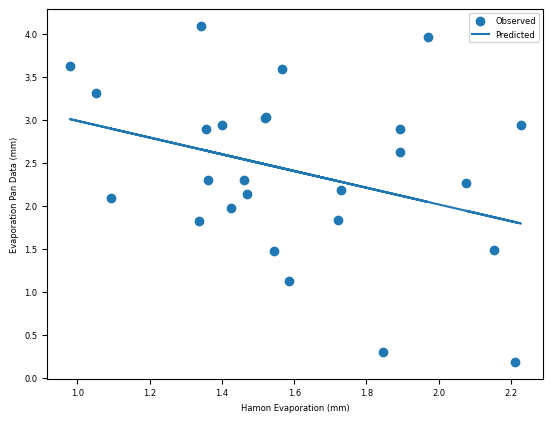

In [68]:
harm_ = np.array(harm).reshape(-1,1)
reg_harm = LinearRegression().fit(harm_,evap_pan);
evap_pred_harm = reg_harm.predict(harm_);
plt.scatter(harm,evap_pan);
plt.plot(harm,evap_pred_harm);
plt.xlabel('Hamon Evaporation (mm)');
plt.ylabel('Evaporation Pan Data (mm)');
plt.legend(['Observed','Predicted']);
print(f"Score:{reg_harm.score(harm_,evap_pan)}");
print(f"Intercept: {reg_harm.intercept_}");
print(f"Coefficient:{reg_harm.coef_}");
print(f"Average Evap per day (mm){sum(harm)/len(harm)}");